# The $k$-means clustering algorithm

*Source: Project assignment form **Andrew Ng** Machine Learning [course](https://www.coursera.org/learn/machine-learning)*.

## Introduction

In the clustering problem, we are given a training set $\{x^{(1)}, . . . , x^{(m)}\}$, and
want to group the data into a few cohesive “clusters.” Here, $x^{(i)} \in \mathbb{R}^n$ as usual; but **no labels** $y^{(i)}$ are given. So, this is an unsupervised learning
problem. In layman's terms, the goal of $k$-means algorithm is to find **structure** in the given unlabeled data. Specifically $k$-means algorithm clusters the data into $k$ number of clusters. 

As we will see, $k$-means is a very simple algorithm to understand and implement. The following image from [PyPR](http://pypr.sourceforge.net/kmeans.html#k-means-example) is an example of $k$-means clustering. 

![title](../img/k-means01.png)

## Use cases

$k$-means is widely used in many applications:

- Image segmentation
- Gene segmentation 
- News article clustering 
- Clustering languages
- Species clustering 
- Anomaly detection

## The algorithm

The $k$-means clustering algorithm is as follows:

- **Step 1:** We pick $k$ random points as **cluster centroids**. Specifically, we define $C = \{c^{(1)}, c^{(2)}, \ldots, c^{(k)}\}$ to be the set of all centroids.


- **Step 2:** We assign each $x^{(i)}$ to the nearest cluster by calculating its distance to each $k$ initial cluster centroid. This is done by calculating the *$L2$ Euclidean distance* between the point and each centroid. Formally, we iteratively compute $${\arg \min}_{c^{(i)} \in C} dist(c^{(i)}, x^{(i)})^2$$ where $dist()$ is the $L2$ *Euclidean distance*.


- **Step 3:** We find the new centroid by taking the average of all the points assigned to a specific cluster. Formally, we iteratively compute $$c^{(i)}  = \frac{1}{|S_i|}\sum_{x^{(i)} \in S_i} x^{(i)}$$ where $S_i$ is the set of all points assigned to the $i^{th}$ cluster.


- **Step 4:** We repeat steps 2 and 3 until convergence.

The bellow animation is an example of running $k$-means clustering on a two-dimensional data set.

![title](../img/k-means02.gif)

## Choosing the value of $k$

Most of the time, the value of $k$ is implicitely given to us in the problem statement. If the value of $k$ is unknown, we use the *elbow method*. Specifically, we run the algorithm for different values of $k$ (typically from $k = 1$ to $10$) and plot the $k$ values against the $SSE$ (sum of squared errors). We select the value of $k$ corresponding to the *elbow point* shown in the figure below.

![text](../img/k-means03.png)

## $k$-means from scratch

In the first section of this notebook, we will implement the $k$-means algorithm from scratch. The data set we are goind to use has $3000$ entries (observations) and $k = 3$ clusters (i.e. the value of $k$ is known). 

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
# importing the data set
data = pd.read_csv('../data/xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [3]:
# DataFrame.values
# Return a Numpy representation of the DataFrame.
# Only the values in the DataFrame will be returned, 
# the axes labels will be removed.

f1  = data['V1'].values # or equivalently f1 = data.V1.values
print(f1)
print(type(f1))

print('\n')

f2 = data['V2'].values # or equivalently f2 = data.V2.values
print(f2)
print(type(f2))

[ 2.072345 17.93671   1.083576 ... 64.46532  90.72282  64.87976 ]
<class 'numpy.ndarray'>


[ -3.241693  15.78481    7.319176 ... -10.50136  -12.25584  -24.87731 ]
<class 'numpy.ndarray'>


In [4]:
X = np.array(list(zip(f1, f2)))
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

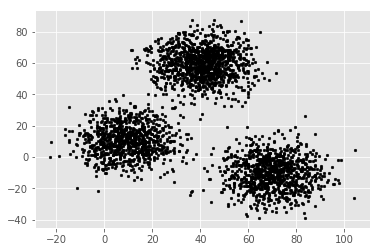

In [5]:
plt.scatter(f1, f2, c = 'black', s = 7)
# or equivalently plt.scatter(data.V1, data.V2, c = 'black', s = 7)

In [6]:
# Euclidean distance calculator
def dist(a, b, ax = 1):
    return np.linalg.norm(a - b, axis = ax)

In [7]:
# number of clusters
k = 3

# x coordinates of initial random centroids
C_x = np.random.randint(0, np.max(X)-20, size = k)
print(C_x)

# y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size = k)
print(C_y)

C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
print(C)

[56 61 46]
[44  2 82]
[[56. 44.]
 [61.  2.]
 [46. 82.]]


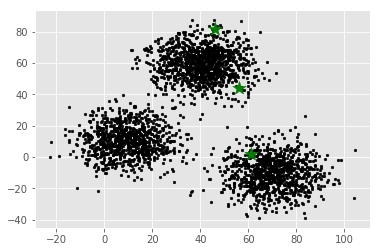

In [8]:
# adding the centroids to the plot
plt.scatter(f1, f2, c = 'black', s = 7)
plt.scatter(C_x, C_y, marker = '*', s = 200, c = 'g')

In [9]:
# storing the value of centroids when it gets updated
C_old = np.zeros(C.shape)
# cluster labels (0, 1, 2)
clusters = np.zeros(len(X))
# error func. - distance between new centroids and old centroids
error = dist(C, C_old, None)
# loop will run till the error becomes zero
while error != 0:
    # assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # storing the old centroid values
    C_old = deepcopy(C)
    # finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

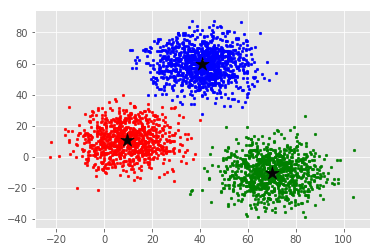

In [10]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i])
ax.scatter(C[:, 0], C[:, 1], marker = '*', s = 200, c = '#050505')

From the above visualization it is clear that there are 3 clusters. The black stars are positioned to each cluster centroid.

## The scikit-learn approach

We will generate a new dataset using the `make_blobs` function from the `datasets` module. This function is specifically designed to generate isotropic Gaussian blobs for clustering. An isotropic Gaussian is one where the covariance matrix is represented by the simplified matrix $\Sigma = \sigma^{2}I$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (18, 9)

# creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

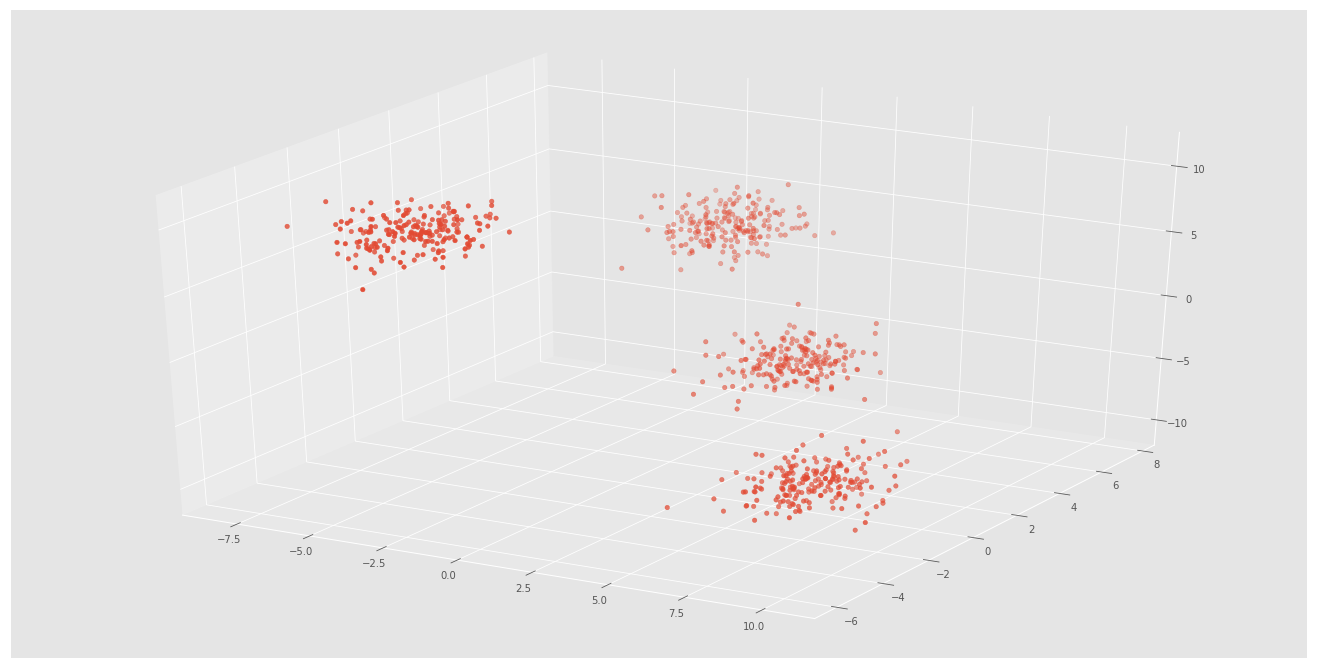

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [13]:
# initializing k-means
kmeans = KMeans(n_clusters=4)
# fitting with inputs
kmeans = kmeans.fit(X)
# predicting the clusters
labels = kmeans.predict(X)
# getting the cluster centroids
C = kmeans.cluster_centers_
print(C)

[[ 3.847973    2.40047902 -2.96803079]
 [-4.45294829 -2.90578555  8.39722481]
 [-0.75055663  5.50059747  3.85104781]
 [ 7.46767408 -1.48817454 -7.97667653]]


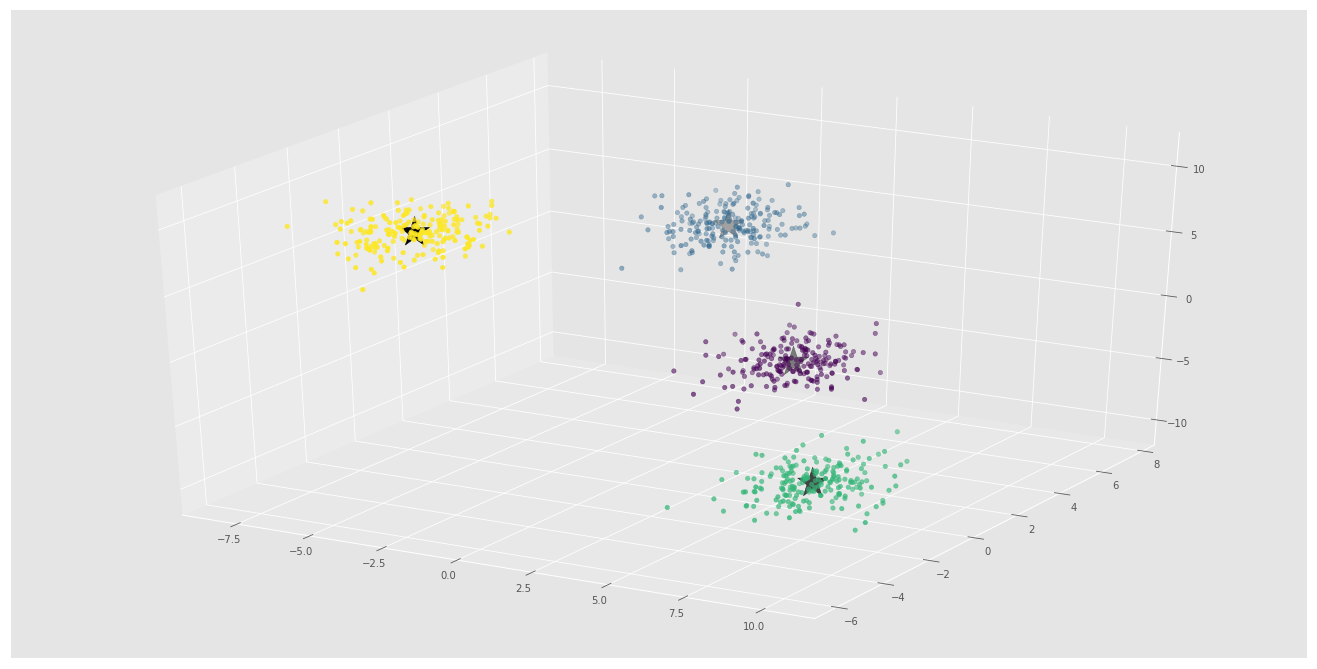

In [14]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', c = '#050505', s = 1000)